In [502]:
from bs4 import BeautifulSoup
#from urllib.request import urlopen
import pandas as pd
import numpy as np
import requests

from sklearn.metrics.pairwise import pairwise_distances

#For plotting
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

## For plotting
from seaborn import set_style
from datetime import datetime

In [432]:
# Get games data:
top_games = pd.read_csv('../Alex/TopGames.csv')

top_games.sample(5)

,Ranking,Name,App_id,Current Players,Peak Players,Hours Played
5247,5247,Battlefield 2,24860,5,28,8377
7545,7545,Condemned: Criminal Origins,4720,2,28,5144
2953,2953,Ultimate Live Wallpaper,1175390,17,31,13997
4711,4711,Luck be a Landlord (DEMO),1439770,6,56,6481
10995,10995,The Tide,1263410,0,0,0


In [433]:
# Get time series data:
data = pd.read_csv('GamesDataAll.csv')

# Make percentile into number and clear "-"
data = data.replace(to_replace='%', value='', regex=True).replace({'-':'NaN'})#.replace(to_replace='Inf', value=+100, regex=True)
#data['Perc_Gain'] = data['Perc_Gain']/100

data.head()

,App_id,Name,Avg_Players,Gain,Perc_Gain,Peak_Players,Last 30 Days,April 2021,March 2021,February 2021,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
0,730,Counter-Strike: Global Offensive,1,0,0,0,695044.47,723346.52,740927.82,741013.24,...,16006.0,15959.89,17372.73,16164.22,14079.39,14134.1,10739.48,16000.75,15475.39,932.57
1,730,Counter-Strike: Global Offensive,0,1,0,0,-28302.0,-17581.31,-85.42,-2196.42,...,46.11,-1412.84,1208.51,2084.83,-54.71,3394.62,-5261.27,525.36,14542.81,NaN
2,730,Counter-Strike: Global Offensive,0,0,1,0,-3.91,-2.37,-0.01,-0.30,...,+0.29,-8.13,+7.48,+14.81,-0.39,+31.61,-32.88,+3.39,+1559.43,NaN
3,730,Counter-Strike: Global Offensive,0,0,0,1,1119102,1148077,1198581,1123485,...,31966,32166,35238,31359,27553,50533,20850,36057,52261,1642
4,570,Dota 2,1,0,0,0,413025.27,413784.97,390412.76,404832.13,...,174835.73,180878.9,166972.97,147748.14,121924.42,101077.43,75965.44,61867.68,55768.61,52721.05


In [469]:
# Prepare for plotting

p_gain_plot = p_gain.drop(columns=['App_id', 'Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players',
       'Last 30 Days'])
gain_plot= gain.drop(columns=['App_id', 'Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players',
       'Last 30 Days'])
avg_plot = avg_players.drop(columns=['App_id', 'Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players',
       'Last 30 Days'])
peak_plot = peak_players.drop(columns=['App_id', 'Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players',
       'Last 30 Days'])

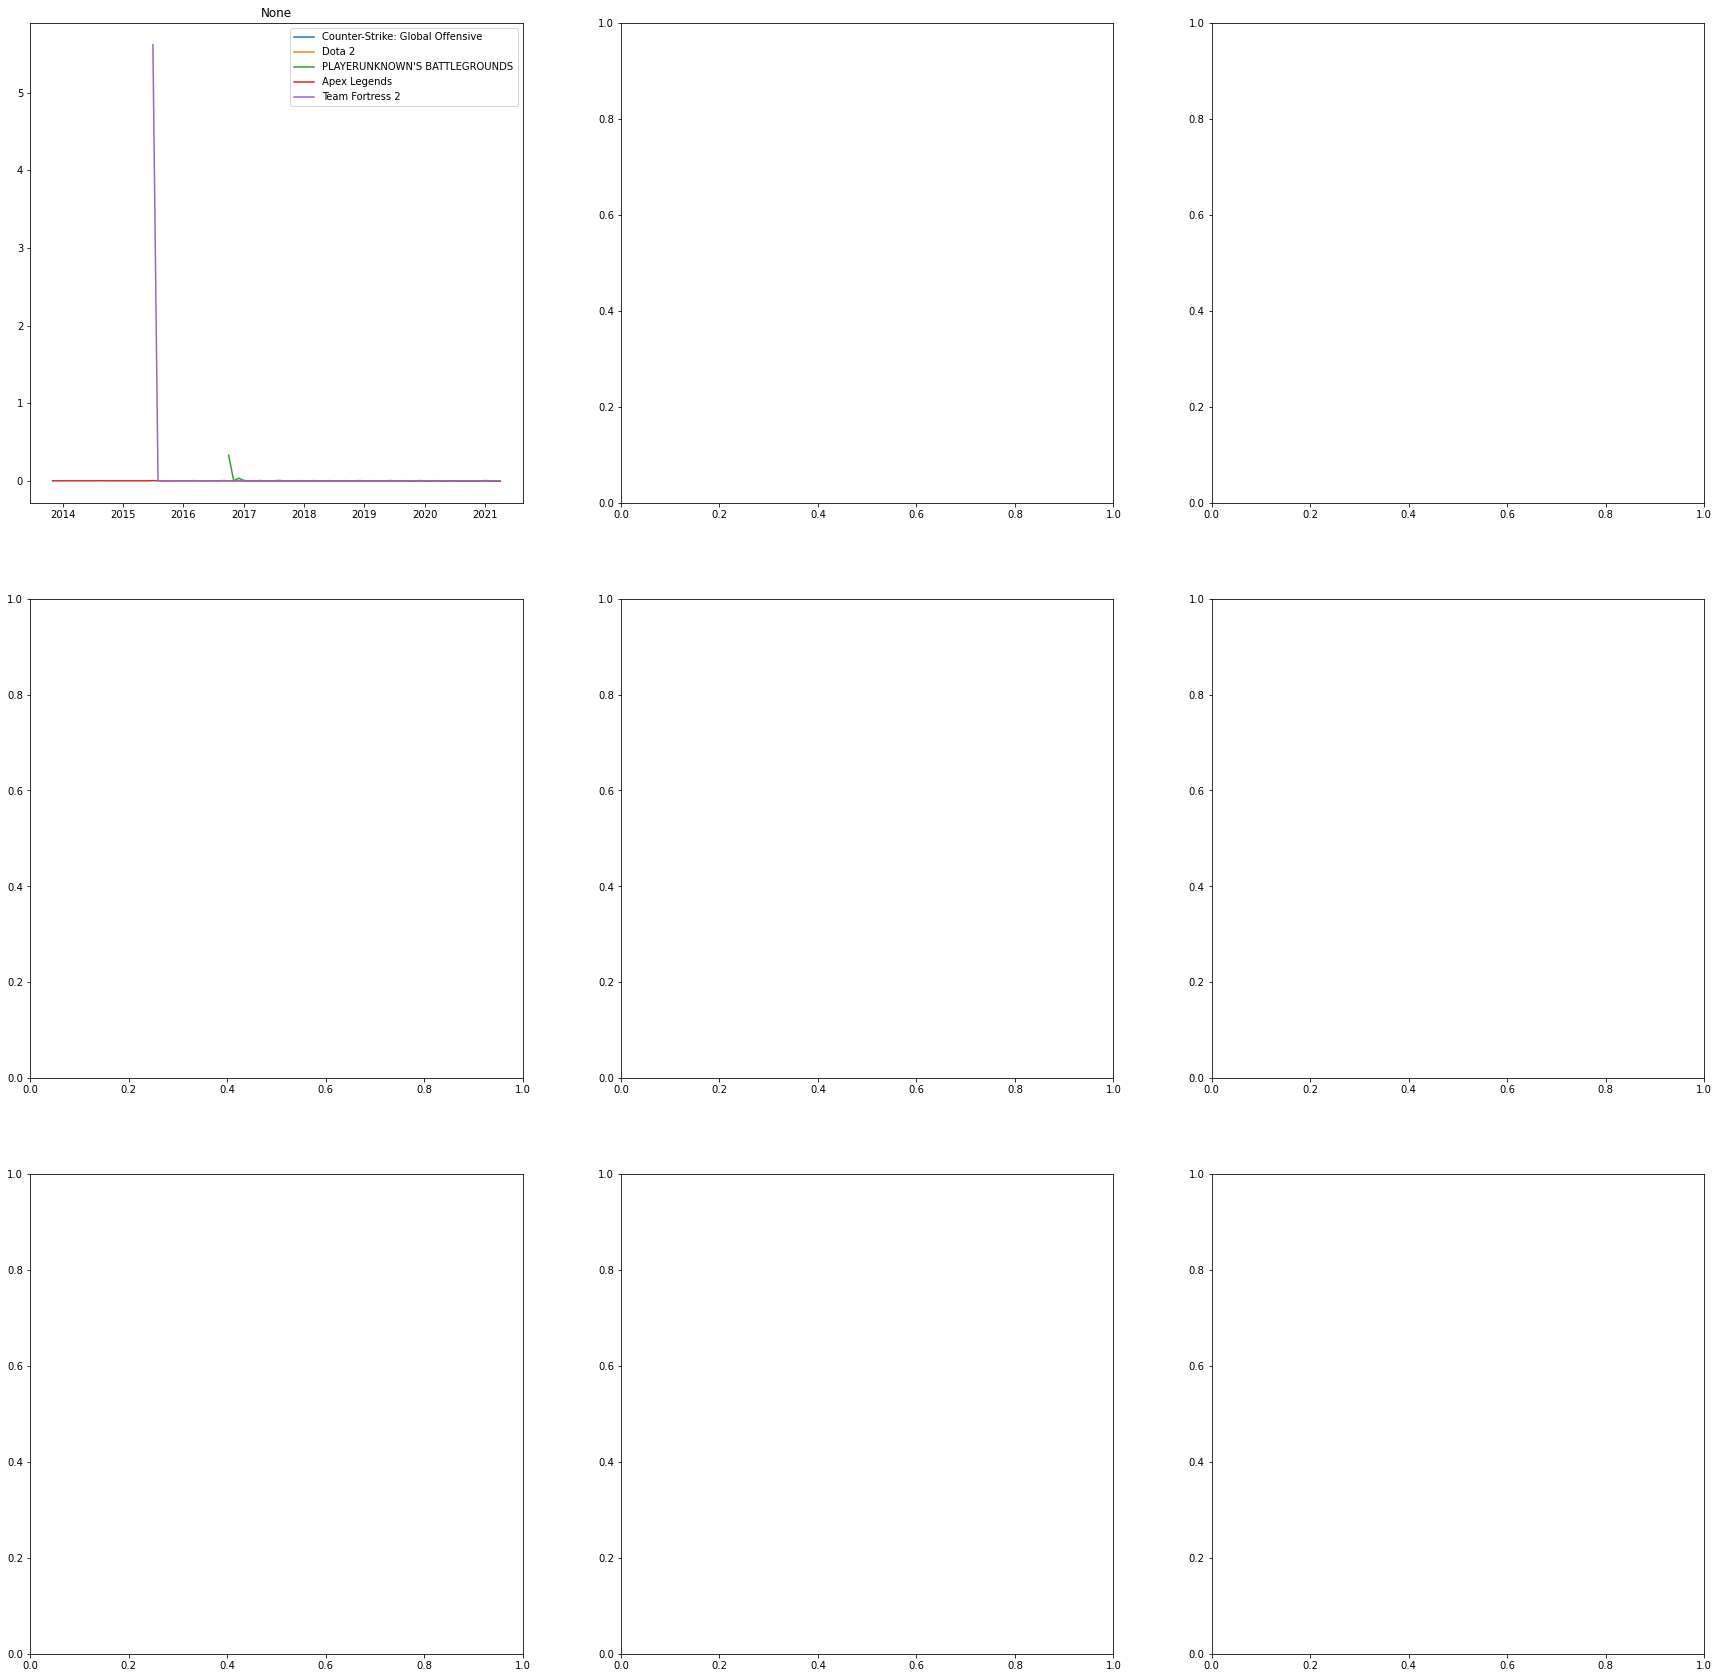

In [450]:
games = p_gain_plot.Name[0:5].index
scale_data(p_gain_plot, games,title=None, original =True, only_original=True,scaling=(1e5))

In [436]:
avg_pure['max'] = avg_pure.max(axis=1)
avg_pure.sort_values(by=['max'], ascending=False, inplace=True)#.reset_index(drop=True)

avg_max = avg_pure['max'].max()+1
bins = [0,50,400,3300,avg_max]
counts  = avg_pure['max'].value_counts(bins=bins, sort=False) 
#plt.scatter(bins[:-1],counts)
print(counts)
print()
print('Using maximum of Avg_Players:')
for i in [100,500,2000,5000]:
    print('The cutoff for top '+str(i)+' games is '+str(avg_pure.reset_index(drop=True)['max'][i]))

(-0.001, 50.0]          4726
(50.0, 400.0]           2984
(400.0, 3300.0]         1487
(3300.0, 1584887.77]     499
Name: max, dtype: int64

Using maximum of Avg_Players:
The cutoff for top 100 games is 24820.66
The cutoff for top 500 games is 3291.5
The cutoff for top 2000 games is 395.07
The cutoff for top 5000 games is 49.52


In [437]:
peak_pure['max'] = peak_pure.max(axis=1)
peak_pure.sort_values(by=['max'], ascending=False, inplace=True)

peak_max = peak_pure['max'].max()+1
bins = [0,50,400,4000,peak_max]
counts  = peak_pure['max'].value_counts(bins=bins, sort=False) 
#plt.scatter(bins[:-1],counts)
print(counts)
print()
print('Using maximum of Peak_Players:')
for i in [100,500,2000,5000]:
    print('The cutoff for top '+str(i)+' games is '+str(peak_pure.reset_index(drop=True)['max'][i]))

(-0.001, 50.0]         2481
(50.0, 400.0]          3251
(400.0, 4000.0]        2839
(4000.0, 3236028.0]    1125
Name: max, dtype: int64

Using maximum of Peak_Players:
The cutoff for top 100 games is 73750.0
The cutoff for top 500 games is 11878.0
The cutoff for top 2000 games is 1665.0
The cutoff for top 5000 games is 212.0


In [443]:
# https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

s_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
ma_scaler = MaxAbsScaler()
r_scaler = RobustScaler()
qt_scaler = QuantileTransformer()
pt_scaler = PowerTransformer(method='yeo-johnson')

In [447]:
#Define a function to plot different scaling of data

def scale_data(df, games,title=None, original =True, only_original=False,scaling=(1e6)):
    
    df_data = df.drop(columns=['Name'])#.reset_index(drop=True)
    
    fig, ax = plt.subplots(3,3,figsize=(30,30))
    
    x = pd.to_datetime(df.columns[1:])
    
    if original:
    #Plot original data
        for i in games:
            ax[0,0].plot(x,df_data.iloc[i].astype(float)/scaling,label=df.Name[i])
            ax[0,0].legend() 
            ax[0,0].set_title(str(title))
    
    if not only_original:
        j=0
    #Scale data and plot
        for name,scaler in (["s_scaler",s_scaler],["mm_scaler",mm_scaler],
                 ["ma_scaler",ma_scaler]):
            scaler.fit(df_data)
            df_scaler = scaler.transform(df_data)
            for i in games:
                ax[1,j].plot(x,df_scaler[i]/scaling,label=df.Name[i])
                ax[1,j].legend()
                ax[1,j].set_title(name)
            j=j+1    
        
        j=0
    #Scale data and plot
        for name,scaler in (["r_scaler",r_scaler],
                 ["qt_scaler",qt_scaler],["pt_scaler",pt_scaler]):
            scaler.fit(df_data)
            df_scaler = scaler.transform(df_data)
            for i in games:
                ax[2,j].plot(x,df_scaler[i]/scaling,label=df.Name[i])
                ax[2,j].legend()
                ax[2,j].set_title(name)
            j=j+1

    plt.show()

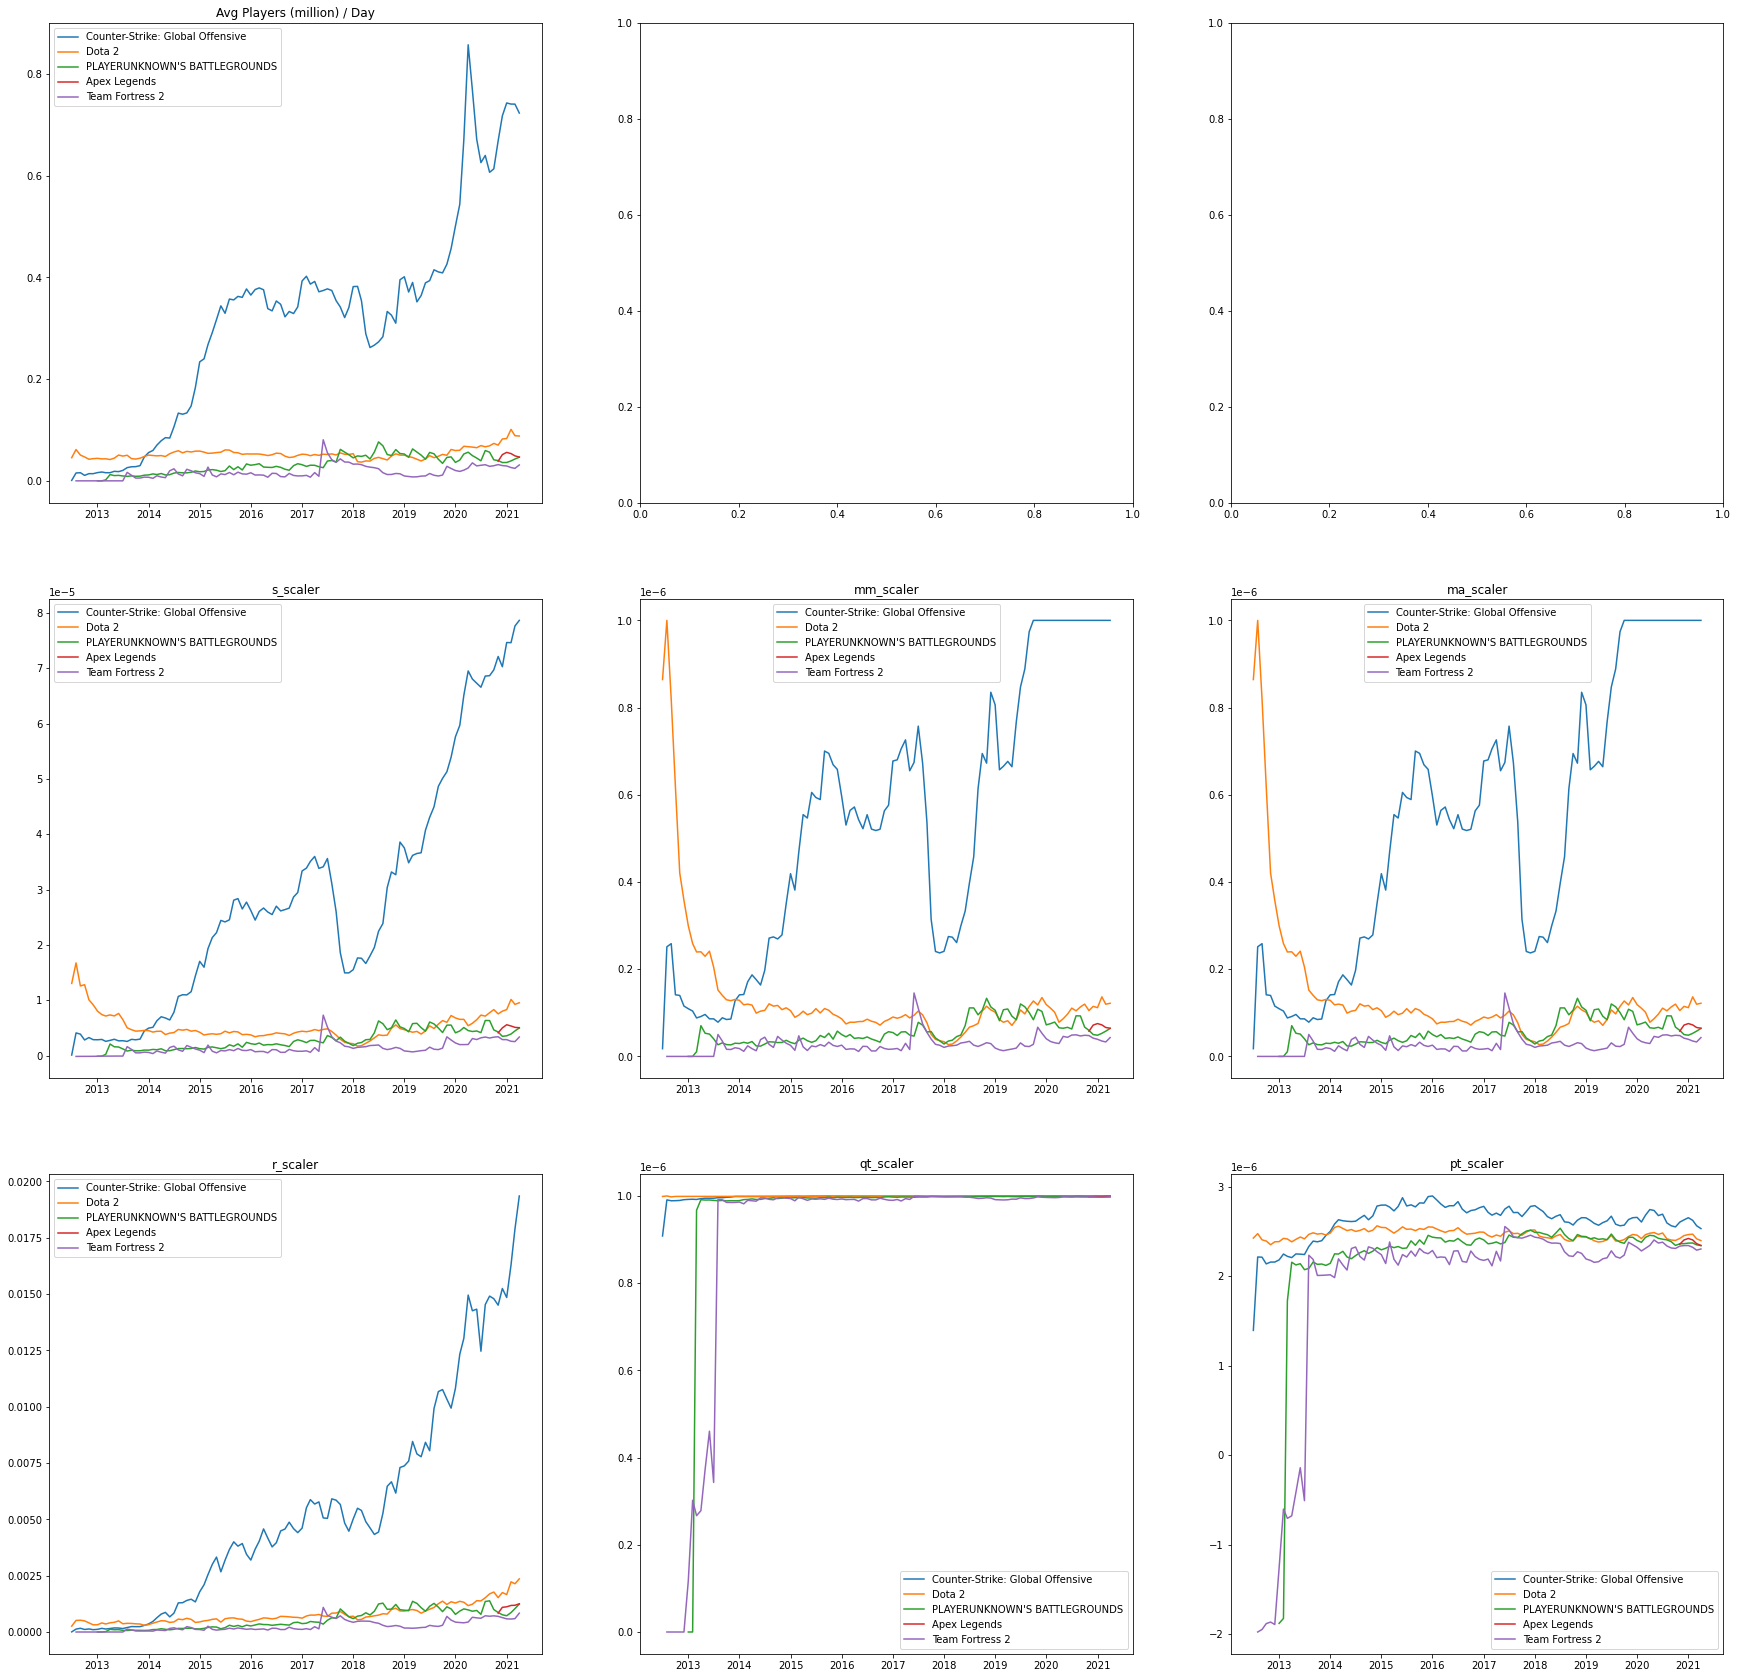

In [429]:
avg_plot = avg_players.drop(columns=['App_id', 'Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players',
       'Last 30 Days'])
games = avg_players.Name[0:5].index
scale_data(avg_plot,games,title="Avg Players (million) / Day")

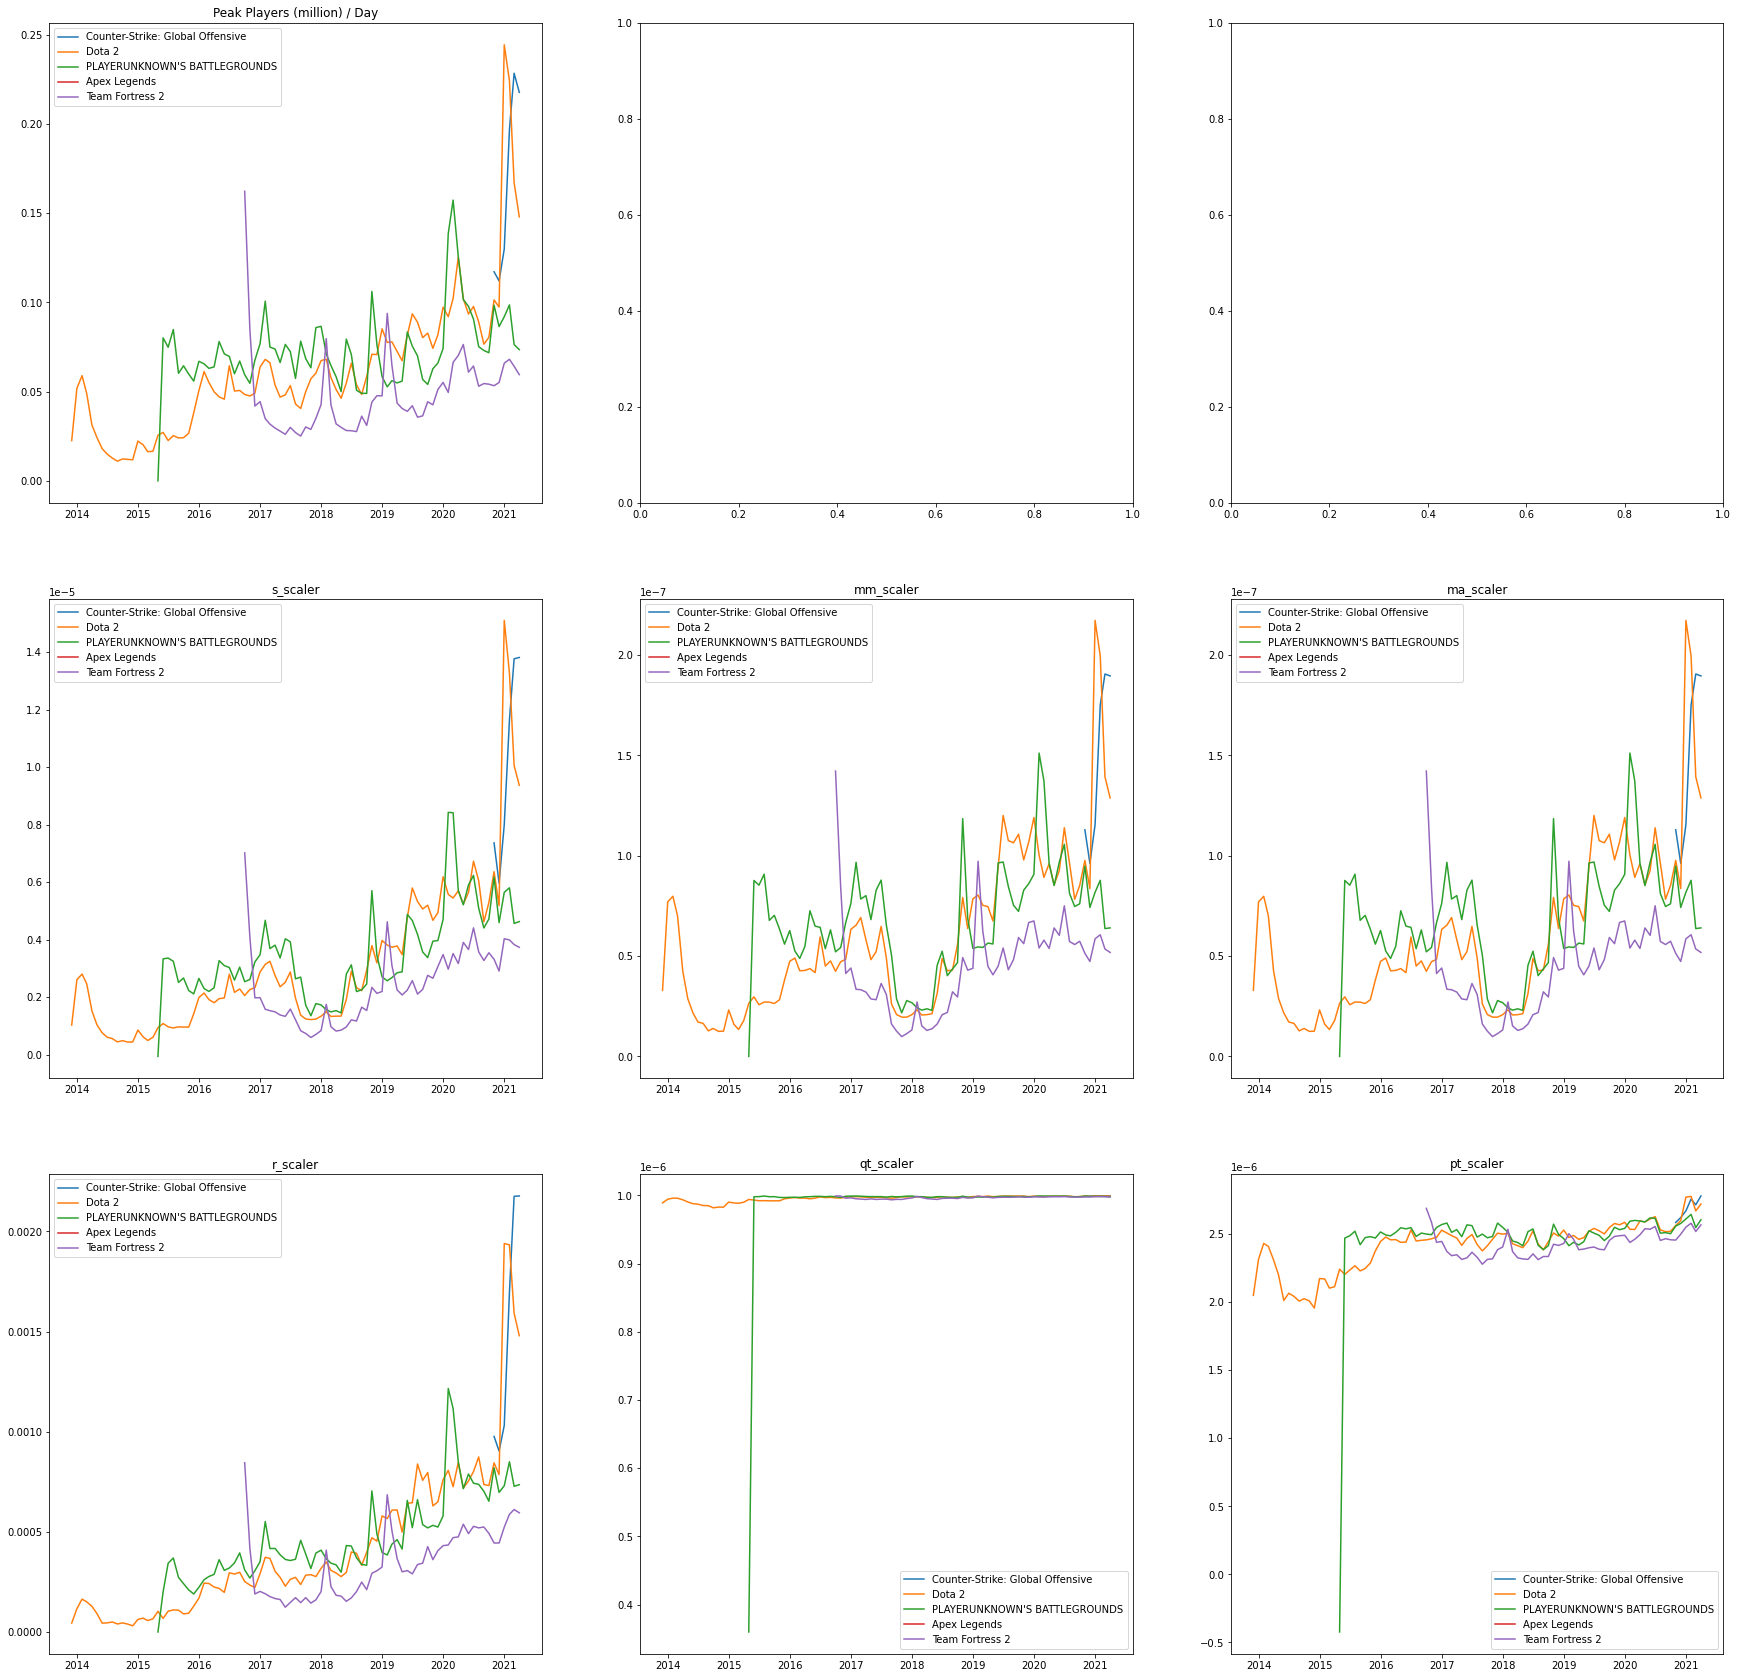

In [422]:
peak_plot = peak_players.drop(columns=['App_id', 'Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players',
       'Last 30 Days'])
games = peak_players.Name[0:5].index
scale_data(peak_plot,games,title="Peak Players (million) / Day")

In [472]:
avg_plot

,Name,April 2021,March 2021,February 2021,January 2021,December 2020,November 2020,October 2020,September 2020,August 2020,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
0,Counter-Strike: Global Offensive,723346.52,740927.82,741013.24,743209.66,717803.75,668754.58,613666.69,606850.32,639957.66,...,16006.0,15959.89,17372.73,16164.22,14079.39,14134.1,10739.48,16000.75,15475.39,932.57
4,Dota 2,413784.97,390412.76,404832.13,432671.65,422552.32,425904.83,406361.36,408609.78,429717.12,...,174835.73,180878.9,166972.97,147748.14,121924.42,101077.43,75965.44,61867.68,55768.61,52721.05
8,PLAYERUNKNOWN'S BATTLEGROUNDS,186110.65,193114.18,198957.52,201247.19,189233.58,179520.26,162585.64,169093.71,192492.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Apex Legends,124905.13,126121.06,120982.64,71766.74,64469.75,74957.26,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Team Fortress 2,88187.0,88703.56,101230.91,83148.17,82423.51,70304.79,73594.08,68866.24,66943.58,...,41942.51,43336.2,43210.75,44255.06,43623.98,42498.53,46978.7,50699.07,61561.37,45566.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41004,Head Shot,1.29,2.42,1.03,1.05,1.27,0.91,1.35,2.42,1.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41008,Othello Let's Go,0.59,0.47,0.75,0.56,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41012,Anomaly Zone - Halloween Pack,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41016,The Westport Independent,1.04,1.26,0.36,0.44,0.43,0.33,0.01,0.14,0.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [494]:
months = pd.to_datetime(avg_plot.columns[1:])

cs_go = avg_plot.drop(columns=['Name']).iloc[0].astype(float)/(1e6)
cs_go

April 2021        0.723347
March 2021        0.740928
February 2021     0.741013
January 2021      0.743210
December 2020     0.717804
                    ...   
November 2012     0.014134
October 2012      0.010739
September 2012    0.016001
August 2012       0.015475
July 2012         0.000933
Name: 0, Length: 106, dtype: float64

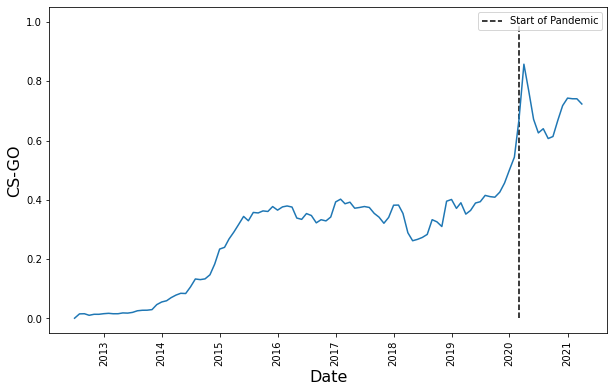

In [495]:
plt.figure(figsize=(10,6))


plt.plot(months,cs_go)

plt.xlabel("Date", fontsize=16)
plt.ylabel("CS-GO", fontsize=16)

#plt.arrow(pd.Timestamp(2020,3,1), case_1963+15000,          0,-15000, width=50, shape='left', color="black")

    #plt.plot(pd.to_datetime(avg_player.columns[3:])             ,avg_player.iloc[i][3:]/(1e6)             ,label=avg_player.iloc[i]['name'])
plt.vlines(pd.Timestamp(2020,3,1)  ,0,1,colors='k',linestyles='dashed',label='Start of Pandemic')    

plt.xticks(rotation=90)

plt.legend()
plt.show()

In [ ]:
#Define a function to plot different scaling of data

def scale_data(df, games,title=None, original =True):
#    df["mean"] = df.mean(axis=1)
#    df = df.loc[df['mean']>cutoff].reset_index(drop=True)
    df_data = df.drop(columns=['Name']).copy()
    #pd.to_datetime(df_data.columns)
    
    fig, ax = plt.subplots(3,3,figsize=(30,30))
    
    if original:
    #Plot original data
        for i in games:
            ax[0,0].plot(df_data.iloc[i][::-1].astype(float)/(1e6),label=df.Name[i])
            ax[0,0].legend() 
            ax[0,0].set_title(str(title))
        
    j=0
    #Scale data and plot
    for name,scaler in (["s_scaler",s_scaler],["mm_scaler",mm_scaler],
                 ["ma_scaler",ma_scaler]):
        scaler.fit(df_data)
        df_scaler = scaler.transform(df_data)
        for i in games:
            ax[1,j].plot(df_scaler[i][::-1]/(1e6),label=df.Name[i])
            ax[1,j].legend()
            ax[1,j].set_title(name)
        j=j+1    
        
    j=0
    #Scale data and plot
    for name,scaler in (["r_scaler",r_scaler],
                 ["qt_scaler",qt_scaler],["pt_scaler",pt_scaler]):
        scaler.fit(df_data)
        df_scaler = scaler.transform(df_data)
        for i in games:
            ax[2,j].plot(df_scaler[i][::-1]/(1e6),label=df.Name[i])
            ax[2,j].legend()
            ax[2,j].set_title(name)
        j=j+1
#    df_uvscaler = df_data.apply(lambda x:x/np.linalg.norm(x,1))
#    for i in games:
#        ax[7].plot(df_uvscaler[i][::-1]/(1e6),label=df.Name[i])
#        ax[7].legend()
#        ax[7].set_title('Unit Vector Scaler')

    plt.show()

In [ ]:
avg_player = pd.read_csv('../Steam Charts/avg_player.csv')
avg_player.drop_duplicates(inplace=True)
avg_player.sort_values('Last 30 Days',ascending=False,inplace=True)
plt.figure(figsize = (15,8))
for i in range(5):
    plt.plot(pd.to_datetime(avg_player.columns[3:])
             ,avg_player.iloc[i][3:]/(1e6)
             ,label=avg_player.iloc[i]['name'])

    plt.vlines(pd.to_datetime('March 11, 2020')
         ,0,1,colors='k',linestyles='dashed'
         ,label='Start of Pandemic')
plt.xlabel("Date",fontsize=18)
plt.ylabel("Avg Players (million) / Day",fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()